# Global Power Plant Database Project

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



# Key attributes of the database


The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 



In [339]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVR
import pickle
import os
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

above file having object, float64 data types

In [ ]:
df.shape # there are 907 rows and 27 columns in this data base

In [ ]:
#Removing maximum number of null values
df.drop(['estimated_generation_gwh','other_fuel1','other_fuel2','wepp_id','url','other_fuel3','name'],axis=1,inplace=True)


In [ ]:
df.isnull().sum()

there many null values in this data base

# Removing Unwanted Columns

In [ ]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.shape# removed three columns

In [ ]:
df.describe()


There is NAN values also in the data set
when there is nan value and counts differnce the prediction never can give a correct ouput, so we need to work on it

In [ ]:
df['year_of_capacity_data'].nunique()

removing above column also beacuse there is only one unique value

In [ ]:
df['geolocation_source'].unique()

In [ ]:
#removing year of capacity data
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [ ]:
#Filling geolocation_source with mode values
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [ ]:
df.fillna(df.median()[0],inplace=True) # filling null values with median

In [ ]:
df.isnull().sum()

In [ ]:
df['source'].nunique()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df['geolocation_source'].unique()

In [ ]:
df.isnull().sum()

In [ ]:
df['source'].nunique()

In [ ]:
df['geolocation_source'].nunique()

In [ ]:
df['country'].nunique()# since it is only one value we going dump this as well 

In [ ]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
sns.countplot('primary_fuel',data=df)

# Exploring Data Analysis

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df['generation_gwh_2013'].nunique()

In [235]:
dfcorr=df.corr()

sns.heatmap(dfcorr,annot=True,linewidth=1)

In [236]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df) # going to drop this data s well

ValueError: Could not interpret value `generation_gwh_2013` for parameter `y`

<Figure size 576x288 with 0 Axes>

In [ ]:
# there is no value shown in 'generation _gwh_2013',afterall we filled nan value data with median

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

Here we can see the number of electricity incresing the no of generationg  capacity in magawattin 2014

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2019',data=df) # we are going to drop this data

In [ ]:
df.drop(['generation_gwh_2019','generation_gwh_2013'],axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

In [ ]:
# we can see that coal is most used here next is Nuclear, then hydro

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=df)

In all coal is most used in india to generate power,and second most nuclear

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

In [ ]:
# coal is the maximum electricity generating in megawatts

# Using Label encoding for covering categorical to numerical

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [238]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [240]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [245]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['primary_fuel']=encoder.fit_transform(df['primary_fuel'])
df['geolocation_source']=encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])
                                                          
                                            

In [246]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


# Outilers Removal

In [253]:
#zscore

z= np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363,
       364, 364, 364, 364, 364, 364, 375, 482, 482, 493, 493, 493, 493,
       493, 493, 494, 494, 494, 494, 494, 494, 532, 623, 648, 648, 648,
       648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
       695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 788,
       808, 808, 808, 808, 808, 808, 880, 880, 880, 880, 880, 880],
      dtype=int64), array([1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [258]:
z = np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
threshold=3
df1 = df[(z<3).all(axis = 1)]

print("shape of the dataframe before removing outlier:",df.shape)
print("Shape of the dataframe after removing outlier:",df1.shape)
print("Percentage of data loss post outler removal:",(df.shape[0]-df1.shape[0])/df.shape[0]*100)

shape of the dataframe before removing outlier: (907, 12)
Shape of the dataframe after removing outlier: (882, 12)
Percentage of data loss post outler removal: 2.7563395810363835


In [261]:
df = df1.copy()# copying all data decoded one to orginal file

In [262]:
df.shape

(882, 12)

# Skewness Handling

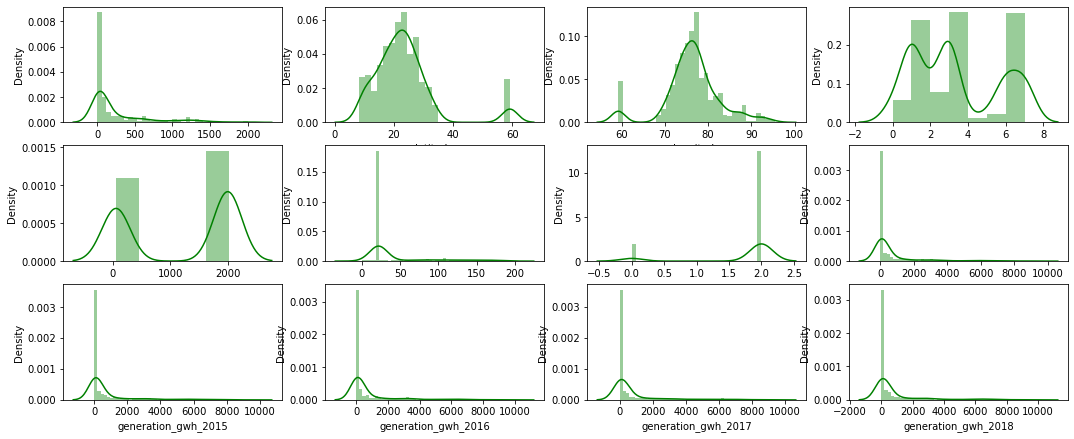

In [263]:
plt.figure(figsize = (18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [264]:
df.skew()

capacity_mw            2.054665
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014    2.885639
generation_gwh_2015    2.711018
generation_gwh_2016    2.651120
generation_gwh_2017    2.563221
generation_gwh_2018    2.615528
dtype: float64

In [ ]:
# above +-0.5 skewness should be treated

In [271]:
df[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]=power_transform(df[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])
df.skew()

capacity_mw            0.016603
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014   -0.016889
generation_gwh_2015   -0.015204
generation_gwh_2016   -0.011726
generation_gwh_2017   -0.006580
generation_gwh_2018   -0.001061
dtype: float64

# Dividing Data into X and Y

In [275]:
x= df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [276]:
x.shape

(882, 11)

In [277]:
y.shape

(882,)

# Scaling X values

In [278]:
sc= MinMaxScaler()
x=sc.fit_transform(x)
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [279]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.293848,0.475981,0.466958,0.562984,0.234037,0.862812,0.568775,0.571681,0.569223,0.567041,0.551176
std,0.204767,0.173376,0.325982,0.490143,0.237462,0.342589,0.196297,0.198850,0.201550,0.209030,0.214026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.172280,0.401798,0.142857,0.000000,0.115789,1.000000,0.479779,0.480732,0.473836,0.467732,0.449059
50%,0.274085,0.475058,0.428571,0.978048,0.115789,1.000000,0.479779,0.480732,0.473836,0.467732,0.449059
75%,0.365181,0.549905,0.857143,0.991832,0.188158,1.000000,0.696765,0.705298,0.696480,0.706463,0.696289
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Spliting the Data 

In [290]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=0)

In [291]:
X_train.shape

(643, 11)

In [292]:
X_test.shape

(239, 11)

In [293]:
y_train.shape

(643,)

In [294]:
y_test.shape

(239,)

In [295]:
LR = LinearRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train,y_train))
LR_predict=LR.predict(X_test)


0.6141272334520792


In [296]:
print('MSE',mean_squared_error(LR_predict,y_test))
print('MAE',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE 0.41251026649605843
MAE 0.49296991586208777
r2_score: 0.32624750273730296


# Ridge

In [298]:
R = Ridge()
R.fit(X_train,y_train)
print(R.score(X_train,y_train))
R_predict=R.predict(X_test)

0.6135685078173263


In [301]:
print('MSE',mean_squared_error(R_predict,y_test))
print('MAE',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE 0.40410573322838444
MAE 0.49115224524013823
r2_score: 0.33134330035731596


# Random ForestRegressor

In [302]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
print(RF.score(X_train,y_train))
RF_PRED=RF.predict(X_test)

0.9666376752932971


In [305]:
print('MSE',mean_squared_error(RF_PRED,y_test))
print('MAE',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE 0.18868523408694451
MAE 0.29626172977937143
r2_score: 0.7633986300046471


# DecisionTreeRegressor

In [306]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)
print(DTR.score(X_train,y_train))
DTR.PRED=DTR.predict(X_test)

0.9925514118980853


In [307]:
print('MSE',mean_squared_error(DTR.PRED,y_test))
print('MAE',mean_absolute_error(DTR.PRED,y_test))
print('r2_score:',r2_score(DTR.PRED,y_test))

MSE 0.270186787903933
MAE 0.3745409826661985
r2_score: 0.704746981492416


# GradientBoostingRegressor

In [308]:
GBR = GradientBoostingRegressor()
GBR.fit(X_train,y_train)
print(GBR.score(X_train,y_train))
GBR.PRED=GBR.predict(X_test)

0.9015627651445203


In [309]:
print('MSE',mean_squared_error(GBR.PRED,y_test))
print('MAE',mean_absolute_error(GBR.PRED,y_test))
print('r2_score:',r2_score(GBR.PRED,y_test))

MSE 0.19937509641739945
MAE 0.3198497885492877
r2_score: 0.746038231648096


In [ ]:
# above model Decision tree Regressor is the best model 99%

# Cross Validation

In [313]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 0.412978, 0.067520
R    : 0.410215, 0.067299
RF    : 0.210436, 0.061586
DTR    : 0.330122, 0.087733
GBR    : 0.205048, 0.059664


# Hyper parameter Tuning

In [318]:
GF = GradientBoostingRegressor()
param={'criterion':['mse','mae'],'n_estimators':[100,200],}
    

In [319]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)


In [321]:
GF_grid.fit(X_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(X_test)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [322]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [323]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.19013945383346906
MAE: 0.29848353156267954
r2_score: 0.7587929407055034


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

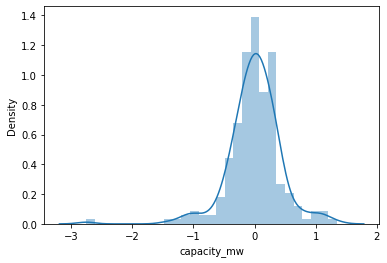

In [324]:
sns.distplot(GF_grid_pred-y_test)


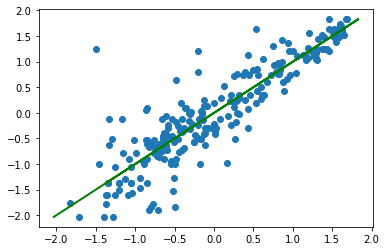

In [325]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Green')

# Taking 'Primary_fuel'as target

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          882 non-null    float64
 1   latitude             882 non-null    float64
 2   longitude            882 non-null    float64
 3   primary_fuel         882 non-null    int32  
 4   commissioning_year   882 non-null    float64
 5   source               882 non-null    int32  
 6   geolocation_source   882 non-null    int32  
 7   generation_gwh_2014  882 non-null    float64
 8   generation_gwh_2015  882 non-null    float64
 9   generation_gwh_2016  882 non-null    float64
 10  generation_gwh_2017  882 non-null    float64
 11  generation_gwh_2018  882 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 79.2 KB


In [329]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [334]:
x_train.shape

(643, 11)

In [331]:
y.shape

(882,)

# Splitting Train and Test data

In [332]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [335]:
x_test.shape

(239, 11)

# Model Building

In [345]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [346]:
logreg=LinearRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print('cross validation score',np.mean(logreg_score))

cross validation score nan


In [347]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8004301489470981


In [348]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7698744769874477
[[ 8  2  0  0  0  0  0  0]
 [ 5 50  7  8  4  1  0  0]
 [ 0  4  6  5  1  2  0  0]
 [ 0  4  5 56  1  1  0  0]
 [ 0  1  2  0  0  0  0  0]
 [ 0  0  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.82      0.67      0.74        75
           2       0.27      0.33      0.30        18
           3       0.81      0.84      0.82        67
           4       0.00      0.00      0.00         3
           5       0.33      0.50      0.40         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.77       239
   macro avg       0.61      0.64      0.62       239
weighted avg       0.80      0.77      0.78       239

Training accuracy:: 1.0
Test accuracy:: 0.7698744769874477


# KNeighborsClassifier

In [349]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.743708269131998


In [350]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6610878661087866
[[ 4  4  0  0  0  0  1  1]
 [ 7 43  5 13  0  0  4  3]
 [ 1  6  5  5  0  0  0  1]
 [ 0  7  2 56  0  2  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  1  0  2  0  0  1  0]
 [ 3  8  0  0  0  0 21  1]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.27      0.40      0.32        10
           1       0.61      0.57      0.59        75
           2       0.38      0.28      0.32        18
           3       0.73      0.84      0.78        67
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.78      0.64      0.70        33
           7       0.83      1.00      0.91        29

    accuracy                           0.66       239
   macro avg       0.45      0.47      0.45       239
weighted avg       0.64      0.66      0.65       239

Training accuracy:: 0.8195956454121306
Test accuracy:: 0.6610878661087866


# RandomForestCassifier

In [353]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8571648690292758


In [354]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8493723849372385
[[ 8  1  0  0  0  0  0  1]
 [ 2 63  3  5  0  1  0  1]
 [ 0  7  6  3  0  1  0  1]
 [ 0  5  0 62  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  0  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.81      0.84      0.82        75
           2       0.50      0.33      0.40        18
           3       0.89      0.93      0.91        67
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00        33
           7       0.91      1.00      0.95        29

    accuracy                           0.85       239
   macro avg       0.67      0.67      0.67       239
weighted avg       0.83      0.85      0.84       239

Training accuracy:: 1.0
Test accuracy:: 0.8493723849372385


# Gradient Boosting Classifier

In [358]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print('cross validation score for Gradient Boosting) Classifier:',np.mean(grbc_score))

cross validation score for Gradient Boosting) Classifier: 0.8628575076608784


In [359]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8619246861924686
[[ 7  3  0  0  0  0  0  0]
 [ 5 61  0  6  2  1  0  0]
 [ 0  6 10  2  0  0  0  0]
 [ 0  5  0 62  0  0  0  0]
 [ 0  1  0  1  1  0  0  0]
 [ 0  1  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.79      0.81      0.80        75
           2       1.00      0.56      0.71        18
           3       0.87      0.93      0.90        67
           4       0.33      0.33      0.33         3
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.86       239
   macro avg       0.79      0.76      0.77       239
weighted avg       0.87      0.86      0.86       239

Training accuracy:: 1.0
Test accuracy:: 0.8619246861924686


# Model training with best parameters

In [360]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [361]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)


In [362]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8410041841004184


# Report of RandomForestClassifier

In [363]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.78      0.83      0.80        75
           2       0.55      0.33      0.41        18
           3       0.91      0.93      0.92        67
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00        33
           7       0.91      1.00      0.95        29

    accuracy                           0.84       239
   macro avg       0.66      0.66      0.66       239
weighted avg       0.82      0.84      0.83       239



<AxesSubplot:>

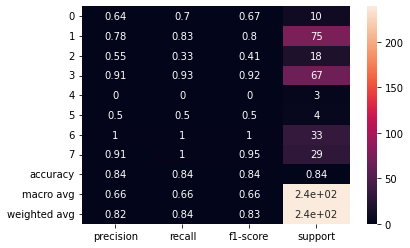

In [364]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)


In [365]:
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.930678 (macro),
0.945529 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.941933 (macro),
0.967563 (weighted by prevalence)


# Saving Model:

In [366]:
import joblib
joblib.dump(best_rfc_grid.best_estimator_,'Global Power Plant Classification.obj')

['Global Power Plant Classification.obj']